<a href="https://colab.research.google.com/github/Sibahlehashe97/Rock-vs-MIne-ML/blob/main/MineVSrockMLL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOgistic regression is used in this model to predict the one column using the other 59 columns

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
#loading the dataset to a pandas Dataframe
sonar_data = pd.read_csv('/content/Copy of sonar data (3).csv', header=None)




In [11]:
sonar_data.head(100)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,0.2988,0.4250,0.6343,0.8198,1.0000,0.9988,0.9508,0.9025,0.7234,0.5122,0.2074,0.3985,0.5890,0.2872,0.2043,0.5782,0.5389,0.3750,0.3411,0.5067,0.5580,0.4778,0.3299,0.2198,0.1407,0.2856,0.3807,0.4158,0.4054,0.3296,0.2707,0.2650,0.0723,0.1238,0.1192,0.1089,0.0623,0.0494,0.0264,0.0081,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,0.1786,0.0658,0.0513,0.3752,0.5419,0.5440,0.5150,0.4262,0.2024,0.4233,0.7723,0.9735,0.9390,0.5559,0.5268,0.6826,0.5713,0.5429,0.2177,0.2149,0.5811,0.6323,0.2965,0.1873,0.2969,0.5163,0.6153,0.4283,0.5479,0.6133,0.5017,0.2377,0.1957,0.1749,0.1304,0.0597,0.1124,0.1047,0.0507,0.0159,0.0195,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,0.2802,0.3086,0.2657,0.3801,0.5626,0.4376,0.2617,0.1199,0.6676,0.9402,0.7832,0.5352,0.6809,0.9174,0.7613,0.8220,0.8872,0.6091,0.2967,0.1103,0.1318,0.0624,0.0990,0.4006,0.3666,0.1050,0.1915,0.3930,0.4288,0.2546,0.1151,0.2196,0.1879,0.1437,0.2146,0.2360,0.1125,0.0254,0.0285,0.0178,0.0052,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,0.1156,0.1654,0.3833,0.3598,0.1713,0.1136,0.0349,0.3796,0.7401,0.9925,0.9802,0.8890,0.6712,0.4286,0.3374,0.7366,0.9611,0.7353,0.4856,0.1594,0.3007,0.4096,0.3170,0.3305,0.3408,0.2186,0.2463,0.2726,0.1680,0.2792,0.2558,0.1740,0.2121,0.1099,0.0985,0.1271,0.1459,0.1164,0.0777,0.0439,0.0061,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0

In [5]:
#number of rows and columns

sonar_data.shape

(208, 61)

In [7]:
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [8]:
pd.set_option('display.max_columns', None)

# Optional: show all rows too
pd.set_option('display.max_rows', None)

In [15]:
#count the identical number of rows
sonar_data.value_counts()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,count
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,
0.0015,0.0186,0.0289,0.0195,0.0515,0.0817,0.1005,0.0124,0.1168,0.1476,0.2118,0.2575,0.2354,0.1334,0.0092,0.1951,0.3685,0.4646,0.5418,0.6260,0.7420,0.8257,0.8609,0.8400,0.8949,0.9945,1.0000,0.9649,0.8747,0.6257,0.2184,0.2945,0.3645,0.5012,0.7843,0.9361,0.8195,0.6207,0.4513,0.3004,0.2674,0.2241,0.3141,0.3693,0.2986,0.2226,0.0849,0.0359,0.0289,0.0122,0.0045,0.0108,0.0075,0.0089,0.0036,0.0029,0.0013,0.0010,0.0032,0.0047,M,1
0.0025,0.0309,0.0171,0.0228,0.0434,0.1224,0.1947,0.1661,0.1368,0.1430,0.0994,0.2250,0.2444,0.3239,0.3039,0.2410,0.0367,0.1672,0.3038,0.4069,0.3613,0.1994,0.4611,0.6849,0.7272,0.7152,0.7102,0.8516,1.0000,0.7690,0.4841,0.3717,0.6096,0.5110,0.2586,0.0916,0.0947,0.2287,0.3480,0.2095,0.1901,0.2941,0.2211,0.1524,0.0746,0.0606,0.0692,0.0446,0.0344,0.0082,0.0108,0.0149,0.0077,0.0036,0.0114,0.0085,0.0101,0.0016,0.0028,0.0014,R,1
0.0036,0.0078,0.0092,0.0387,0.0530,0.1197,0.1243,0.1026,0.1239,0.0888,0.0937,0.1245,0.1599,0.1542,0.1846,0.1732,0.1477,0.1748,0.1455,0.1579,0.2257,0.1975,0.3368,0.5828,0.8505,1.0000,0.8457,0.6624,0.5564,0.3925,0.3233,0.2054,0.1920,0.2227,0.3147,0.2268,0.0795,0.0748,0.1166,0.1969,0.2619,0.2507,0.1983,0.0948,0.0931,0.0965,0.0381,0.0435,0.0336,0.0055,0.0079,0.0119,0.0055,0.0035,0.0036,0.0004,0.0018,0.0049,0.0024,0.0016,R,1
0.0039,0.0063,0.0152,0.0336,0.0310,0.0284,0.0396,0.0272,0.0323,0.0452,0.0492,0.0996,0.1424,0.1194,0.0628,0.0907,0.1177,0.1429,0.1223,0.1104,0.1847,0.3715,0.4382,0.5707,0.6654,0.7476,0.7654,0.8555,0.9720,0.9221,0.7502,0.7209,0.7757,0.6055,0.5021,0.4499,0.3947,0.4281,0.4427,0.3749,0.1972,0.0511,0.0793,0.1269,0.1533,0.0690,0.0402,0.0534,0.0228,0.0073,0.0062,0.0062,0.0120,0.0052,0.0056,0.0093,0.0042,0.0003,0.0053,0.0036,R,1
0.0047,0.0059,0.0080,0.0554,0.0883,0.1278,0.1674,0.1373,0.2922,0.3469,0.3265,0.3263,0.2301,0.1253,0.2102,0.2401,0.1928,0.1673,0.1228,0.0902,0.1557,0.3291,0.5268,0.6740,0.7906,0.8938,0.9395,0.9493,0.9040,0.9151,0.8828,0.8086,0.7180,0.6720,0.6447,0.6879,0.6241,0.4936,0.4144,0.4240,0.4546,0.4392,0.4323,0.4921,0.4710,0.3196,0.2241,0.1806,0.0990,0.0251,0.0129,0.0095,0.0126,0.0069,0.0039,0.0068,0.0060,0.0045,0.0002,0.0029,M,1
0.0050,0.0017,0.0270,0.0450,0.0958,0.0830,0.0879,0.1220,0.1977,0.2282,0.2521,0.3484,0.3309,0.2614,0.1782,0.2055,0.2298,0.3545,0.6218,0.7265,0.8346,0.8268,0.8366,0.9408,0.9510,0.9801,0.9974,1.0000,0.9036,0.6409,0.3857,0.2908,0.2040,0.1653,0.1769,0.1140,0.0740,0.0941,0.0621,0.0426,0.0572,0.1068,0.1909,0.2229,0.2203,0.2265,0.1766,0.1097,0.0558,0.0142,0.0281,0.0165,0.0056,0.0010,0.0027,0.0062,0.0024,0.0063,0.0017,0.0028,M,1
0.0056,0.0267,0.0221,0.0561,0.0936,0.1146,0.0706,0.0996,0.1673,0.1859,0.2481,0.2712,0.2934,0.2637,0.1880,0.1405,0.2028,0.2613,0.2778,0.3346,0.3830,0.4003,0.5114,0.6860,0.7490,0.7843,0.9021,1.0000,0.8888,0.6511,0.6083,0.4463,0.2948,0.1729,0.1488,0.0801,0.1770,0.1382,0.2404,0.2046,0.1970,0.2778,0.1377,0.0685,0.0664,0.1665,0.1807,0.1245,0.0516,0.0044,0.0185,0.0072,0.0055,0.0074,0.0068,0.0084,0.0037,0.0024,0.0034,0.0007,M,1
0.0065,0.0122,0.0068,0.0108,0.0217,0.0284,0.0527,0.0575,0.1054,0.1109,0.0937,0.0827,0.0920,0.0911,0.1487,0.1666,0.1268,0.1374,0.1095,0.1286,0.2146,0.2889,0.4238,0.6168,0.8167,0.9622,0.8280,0.5816,0.4667,0.3539,0.2727,0.1410,0.1863,0.2176,0.2360,0.1725,0.0589,0.0621,0.1847,0.2452,0.2984,0.3041,0.2275,0.1480,0.1102,0.1178,0.0608,0.0333,0.0276,0.0100,0.0023,0.0069,0.0025,0.0027,0.0052,0.0036,0.0026,0.0036,0.0006,0.0035,R,1
0.0067,0.0096,0.0024,0.0058,0.0197,0.0618,0.0432,0.0951,0.0836,0.1180,0.0978,0.0909,0.0656,0.0593,0.0832,0.1297,0.2038,0.3811,0.4451,0.5224,0.5911,0.6566,0.6308,0.5998,0.4958,0.5647,0.6906,0.8513,1.0000,0.9166,0.7676,0.6177,0.5468,0.5516,0.5463,0.5515,0.4561,0.3466,0.3384,0.2853,0.2502,0.1641,0.1605,0.1491,0.1326,0.0687,0.0602,0.0561,0.0306,0.0154,0.0029,0.0048,0.0

In [16]:
#60 is the column name
sonar_data[60].value_counts()

,count
60,
M,111
R,97


In [17]:
#groups column 60 and finds means of groups
sonar_data.groupby(60).mean

<bound method GroupBy.mean of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7ff5f4210f50>>

In [18]:
#Seperating data and target rock or mine
X=sonar_data.drop(columns=60, axis=1)
Y=sonar_data[60]

In [19]:
print(X)


         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
5    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
6    0.0317  0.0956  0.1321  0.1408  0.1674  0.1710  0.0731  0.1401  0.2083   
7    0.0519  0.0548  0.0842  0.0319  0.1158  0.0922  0.1027  0.0613  0.1465   
8    0.0223  0.0375  0.0484  0.0475  0.0647  0.0591  0.0753  0.0098  0.0684   
9    0.0164  0.0173  0.0347  0.0070  0.0187  0.0671  0.1056  0.0697  0.0962   
10   0.0039  0.0063  0.0152  0.0336  0.0310  0.0284  0.0396  0.0272  0.0323   
11   0.0123  0.0309  0.0169  0.0313  0.0358  0.0102 

In [20]:
print(Y)

0      R
1      R
2      R
3      R
4      R
5      R
6      R
7      R
8      R
9      R
10     R
11     R
12     R
13     R
14     R
15     R
16     R
17     R
18     R
19     R
20     R
21     R
22     R
23     R
24     R
25     R
26     R
27     R
28     R
29     R
30     R
31     R
32     R
33     R
34     R
35     R
36     R
37     R
38     R
39     R
40     R
41     R
42     R
43     R
44     R
45     R
46     R
47     R
48     R
49     R
50     R
51     R
52     R
53     R
54     R
55     R
56     R
57     R
58     R
59     R
60     R
61     R
62     R
63     R
64     R
65     R
66     R
67     R
68     R
69     R
70     R
71     R
72     R
73     R
74     R
75     R
76     R
77     R
78     R
79     R
80     R
81     R
82     R
83     R
84     R
85     R
86     R
87     R
88     R
89     R
90     R
91     R
92     R
93     R
94     R
95     R
96     R
97     M
98     M
99     M
100    M
101    M
102    M
103    M
104    M
105    M
106    M
107    M
108    M
109    M
110    M
1

In [25]:
#This uses train_test_split() from scikit-learn (sklearn.model_selection) to split your dataset into training and testing parts.
#👉 This line splits your data into a training set and a test set,
#while keeping the 'R'/'M' class balance the same in both parts.
#So you can:
#Train your model on X_train, Y_train
#Evaluate its accuracy on X_test, Y_test


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=1)

In [23]:
Y.shape

(208,)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(208, 60) (187, 60) (21, 60)


In [ ]:
print(X_train)
print(Y_train)

         0       1       2       3       4       5       6       7       8   \
115  0.0414  0.0436  0.0447  0.0844  0.0419  0.1215  0.2002  0.1516  0.0818   
38   0.0123  0.0022  0.0196  0.0206  0.0180  0.0492  0.0033  0.0398  0.0791   
56   0.0152  0.0102  0.0113  0.0263  0.0097  0.0391  0.0857  0.0915  0.0949   
123  0.0270  0.0163  0.0341  0.0247  0.0822  0.1256  0.1323  0.1584  0.2017   
18   0.0270  0.0092  0.0145  0.0278  0.0412  0.0757  0.1026  0.1138  0.0794   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
140  0.0412  0.1135  0.0518  0.0232  0.0646  0.1124  0.1787  0.2407  0.2682   
5    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
154  0.0117  0.0069  0.0279  0.0583  0.0915  0.1267  0.1577  0.1927  0.2361   
131  0.1150  0.1163  0.0866  0.0358  0.0232  0.1267  0.2417  0.2661  0.4346   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   

         9   ...      50      51      52      53   

In [28]:
#created a categorical/classification model not refression
model = LogisticRegression()

In [29]:
#The algorithm looks at all the sonar readings (X_train) and their correct labels (Y_train).
#It tries to find a mathematical relationship — a set of weights (one for each feature) and a bias — that best separates the two classes (R and M).
#The model learns the patterns that distinguish Rocks (R) from Mines (M) based on the 60 input features.


model.fit(X_train, Y_train)

LogisticRegression()

In [30]:
#accuracy on training data
#Uses your trained logistic regression model to predict labels for the training data.
#The model looks at each sonar sample in X_train (its 60 features) and outputs its prediction:


X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)


In [31]:
print("Accuracy on training data:",training_data_accuracy)

Accuracy on training data: 0.8342245989304813


In [35]:
#accuracy on training data
#Uses your trained logistic regression model to make predictions on the test set (X_test).
#Each row in X_test represents a sonar sample the model hasn’t seen before.
#The model outputs its prediction for each one — 'R' or 'M'.


X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [36]:
print("Accuracy on training data:",test_data_accuracy)

Accuracy on training data: 0.7619047619047619


In [37]:
print(X.shape, X_train.shape, X_test.shape)

(208, 60) (187, 60) (21, 60)


In [38]:
model = LogisticRegression()

In [39]:
model.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation

In [40]:
x_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(x_train_prediction, Y_train)

In [41]:
print("Accuracy on training data:",training_data_accuracy)

Accuracy on training data: 0.8342245989304813


In [42]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [43]:
input_data = (0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094)

#Changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a Mine')

['M']
The object is a Mine


The bar chart displays the distribution of classes in the Sonar dataset. The X-axis represents the two object types: Rock (R) and Mine (M), while the Y-axis shows the number of samples for each class. From the chart, we can see how many sonar readings belong to each category, which helps us understand whether the dataset is balanced or skewed

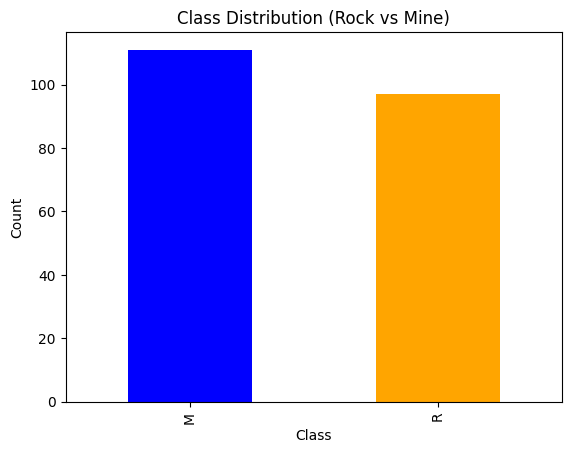

In [44]:
import matplotlib.pyplot as plt
sonar_data[60].value_counts().plot(kind='bar', color=['blue','orange'])
plt.title('Class Distribution (Rock vs Mine)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


The histogram shows the distribution of values for Feature 3 (the fourth sonar frequency) across all samples in the dataset. The X-axis represents the range of amplitude values, while the Y-axis shows how many samples fall into each value range (bin). Peaks in the histogram indicate amplitude values that occur more frequently, helping to understand the overall behavior of this feature and whether it differs between classes. This type of visualization is useful for identifying patterns, outliers, or skewness in individual features.

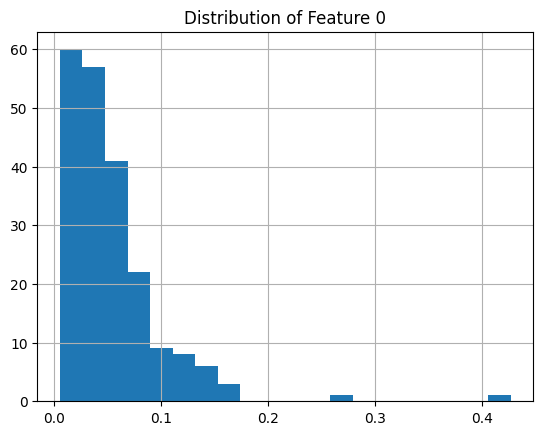

In [46]:
sonar_data[3].hist(bins=20)
plt.title('Distribution of Feature 0')
plt.show()


The pair plot shows scatter plots of relationships between the first three sonar features (0, 1, 2) and the class label. Each point represents a sample, and the color (controlled by hue=60) indicates its class: Rock (R) or Mine (M). The diagonal plots show the distribution of each feature individually. This visualization helps identify patterns and separability between classes — for example, whether certain combinations of features can distinguish Rocks from Mines. It’s a useful tool for exploring feature relationships and class separation before building a model

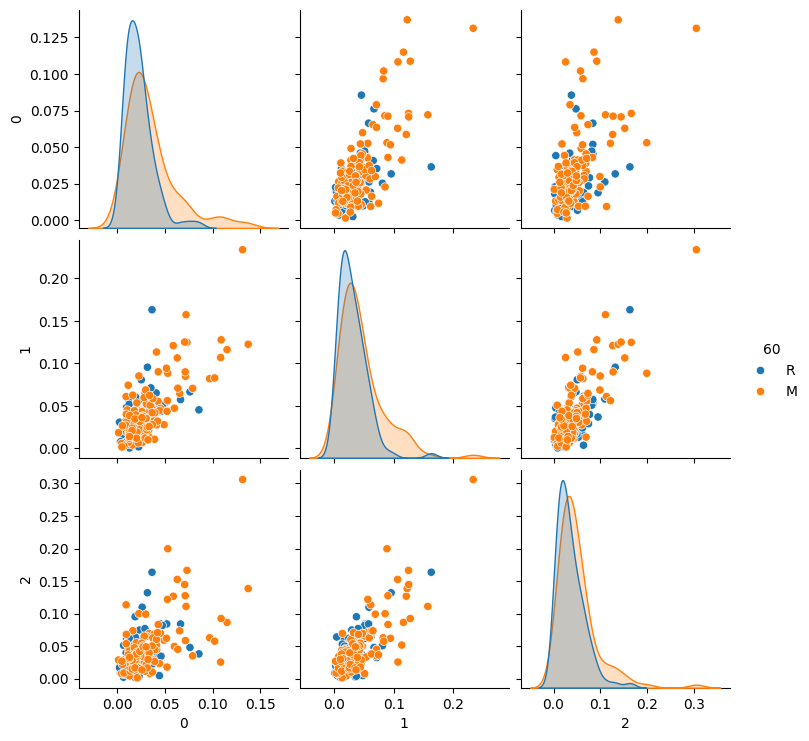

In [49]:
import seaborn as sns
sns.pairplot(sonar_data[[0,1,2,60]], hue=60)
plt.show()


This heatmap visualizes the correlation between the first 20 sonar features in the dataset. Each cell shows how strongly a pair of features is related, with values ranging from -1 (strong negative correlation) to +1 (strong positive correlation). Warm colors (reds) indicate features that increase together, while cool colors (blues) indicate features that move in opposite directions. By focusing on only the first 20 features, this plot allows a clearer view of relationships and potential redundancies among a smaller subset of sonar measurements.

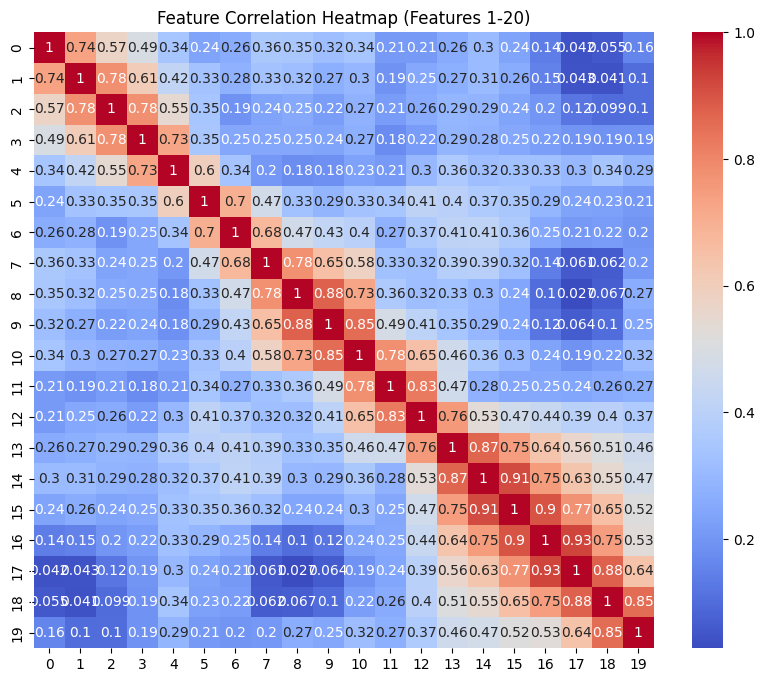

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only columns 1–20 (remember Python indexing is zero-based)
subset_features = sonar_data.iloc[:, 0:20]  # columns 0 to 19

# Compute correlation for the subset
corr_subset = subset_features.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_subset, cmap='coolwarm', annot=True)
plt.title('Feature Correlation Heatmap (Features 1-20)')
plt.show()


This line plot shows the average sonar signal patterns for Rocks and Mines across all 60 features. Each line represents the mean amplitude of the sonar readings at each frequency for one class. Peaks and valleys highlight the frequencies where Rocks and Mines differ, revealing patterns that help distinguish the two classes. This visualization provides a clear summary of the typical signal behavior for each object type.

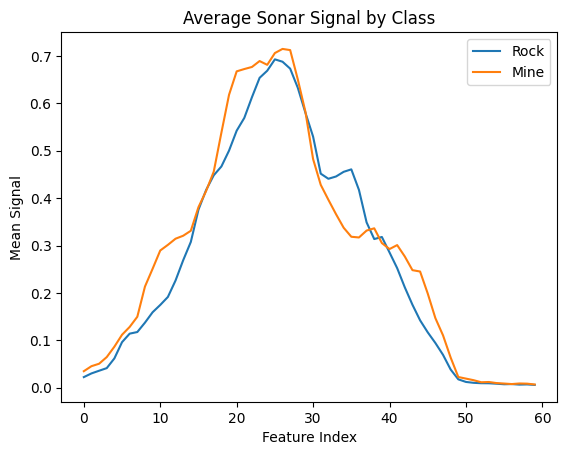

In [51]:
rock_mean = sonar_data[sonar_data[60]=='R'].iloc[:,:60].mean()
mine_mean = sonar_data[sonar_data[60]=='M'].iloc[:,:60].mean()

plt.plot(rock_mean, label='Rock')
plt.plot(mine_mean, label='Mine')
plt.title('Average Sonar Signal by Class')
plt.xlabel('Feature Index')
plt.ylabel('Mean Signal')
plt.legend()
plt.show()


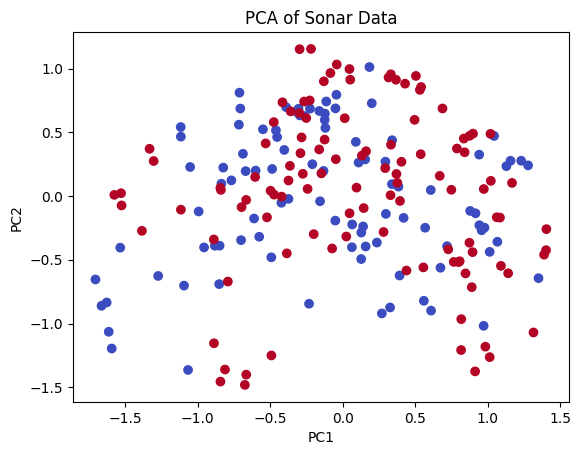

In [53]:
from sklearn.decomposition import PCA

X = sonar_data.iloc[:,:60]
y = sonar_data[60]
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1], c=y.map({'R':0,'M':1}), cmap='coolwarm')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Sonar Data')
plt.show()


This 3D surface plot visualizes the sonar signal amplitudes for multiple samples across all features.

X-axis (Feature Index): Each of the 60 sonar features/frequencies.

Y-axis (Sample Index): The first 20 samples in the dataset.

Z-axis (Signal Amplitude): The strength of the sonar reflection at each feature for each sample.

The surface shows how the sonar readings vary across both samples and features. Peaks represent strong reflections, and valleys represent weak reflections. This visualization allows you to see patterns in the data, and potentially differences between Rocks and Mines, across multiple features and samples at once.

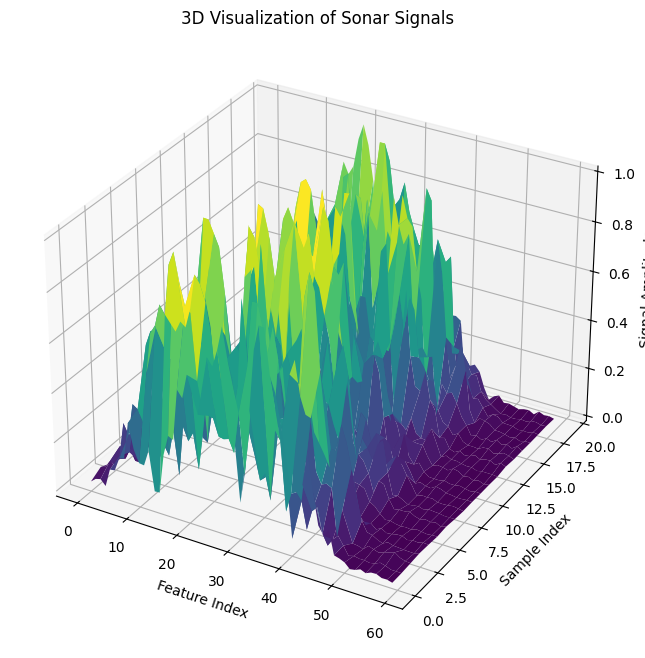

In [57]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Pick a subset of rows to keep the plot readable
rows_to_plot = 20
X = np.arange(60)  # feature indices
Y = np.arange(rows_to_plot)  # sample indices
X, Y = np.meshgrid(X, Y)

# Z = amplitude values
Z = np.array([sonar_data.iloc[i, :60] for i in range(rows_to_plot)])

# Create 3D plot
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('Feature Index')
ax.set_ylabel('Sample Index')
ax.set_zlabel('Signal Amplitude')
ax.set_title('3D Visualization of Sonar Signals')
plt.show()


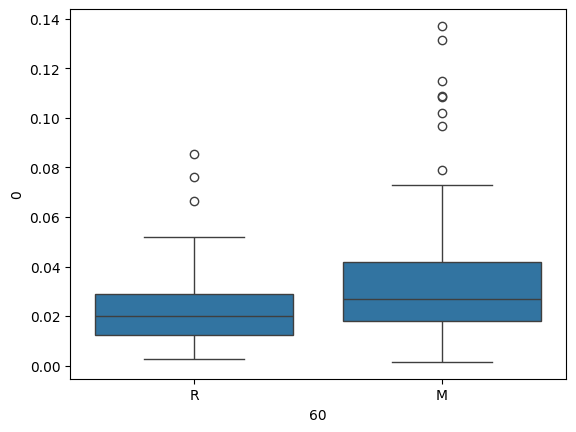

In [54]:
sns.boxplot(x=60, y=0, data=sonar_data)
plt.show()


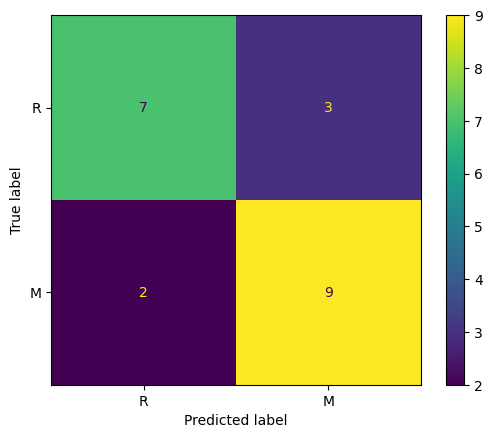

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test, y_pred, labels=['R','M'])
ConfusionMatrixDisplay(cm, display_labels=['R','M']).plot()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

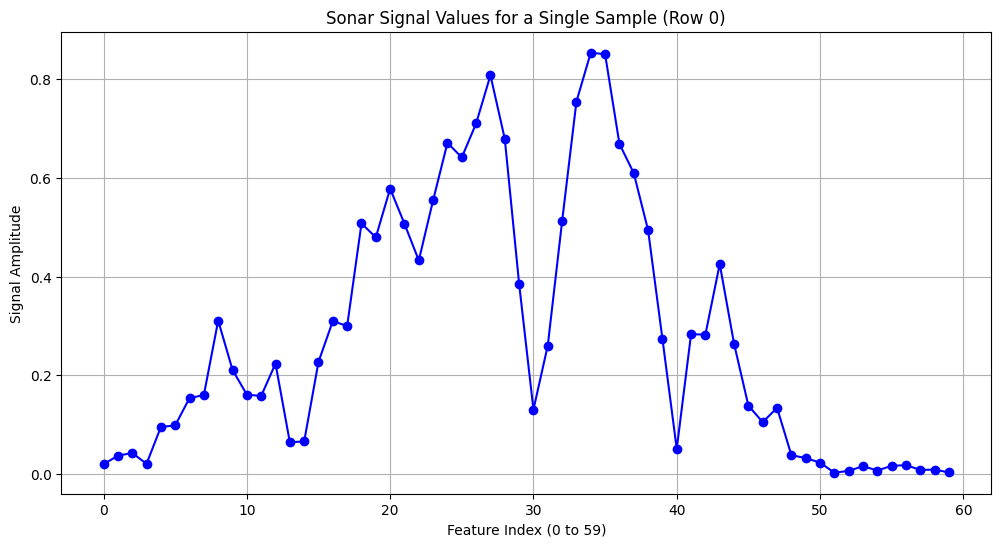

In [52]:
import matplotlib.pyplot as plt

# Pick a sample row from your dataframe, e.g., the first row
sample_row = sonar_data.iloc[0, :60]  # first row, first 60 features

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(sample_row, marker='o', linestyle='-', color='blue')
plt.title('Sonar Signal Values for a Single Sample (Row 0)')
plt.xlabel('Feature Index (0 to 59)')
plt.ylabel('Signal Amplitude')
plt.grid(True)
plt.show()


In [ ]:
#traiin the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test))